In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Input

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import kagglehub

In [2]:
tf.__version__

'2.18.0'

In [3]:
%load_ext tensorboard

In [4]:
logdir='log'

In [5]:
path = kagglehub.dataset_download("taweilo/wine-quality-dataset-balanced-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\vsts\.cache\kagglehub\datasets\taweilo\wine-quality-dataset-balanced-classification\versions\1


In [6]:
df = pd.read_csv('C:/Users/vsts/.cache/kagglehub/datasets/taweilo/wine-quality-dataset-balanced-classification/versions/1/wine_data.csv')

In [7]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         21000 non-null  float64
 1   volatile_acidity      21000 non-null  float64
 2   citric_acid           21000 non-null  float64
 3   residual_sugar        21000 non-null  float64
 4   chlorides             21000 non-null  float64
 5   free_sulfur_dioxide   21000 non-null  float64
 6   total_sulfur_dioxide  21000 non-null  float64
 7   density               21000 non-null  float64
 8   pH                    21000 non-null  float64
 9   sulphates             21000 non-null  float64
 10  alcohol               21000 non-null  float64
 11  quality               21000 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.9 MB


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3


In [8]:
df_ml = df.copy()

In [9]:
df_ml.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df_ml.duplicated().sum()

np.int64(6060)

In [11]:
df_ml.drop_duplicates(keep='first', inplace=True)

In [12]:
df_ml.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000
mean,9.619956,0.746201,0.762662,29.421767,0.190994,122.365000,220.594525,1.008847,3.164686,0.988583,11.260888,5.973695
std,2.440643,0.369823,0.392536,19.674421,0.126539,78.780757,102.328384,0.012278,0.171607,0.414441,1.184349,1.908031
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.300000,0.370000,0.370000,6.500000,0.059000,38.000000,137.000000,0.996300,3.040000,0.580000,10.400000,4.000000
50%,9.700000,0.785000,0.820000,36.000000,0.192000,136.550000,228.000000,1.010970,3.150000,1.020000,11.300000,6.000000
75%,11.600000,1.060000,1.100000,46.200000,0.290000,190.900000,307.000000,1.019230,3.280000,1.340000,12.200000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


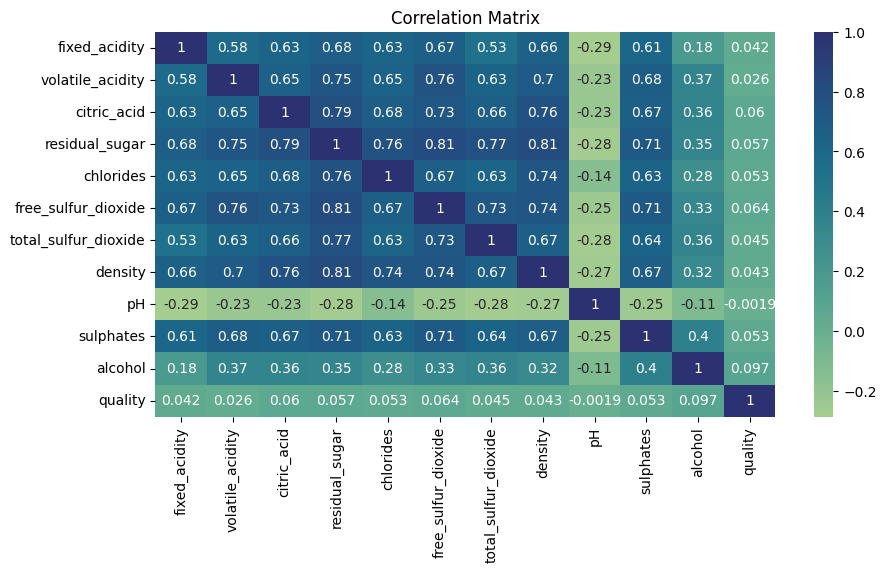

In [13]:
matrix = df_ml.corr()

plt.subplots(figsize=(10, 5))

sns.heatmap(matrix, annot=True, cmap='crest')
plt.title("Correlation Matrix")

plt.savefig('correlation_matrix.png', bbox_inches='tight', dpi=300)

plt.show()

In [14]:
X = df_ml.drop('quality', axis=1).values
y = df_ml['quality'].values

In [15]:
y = np.where((y >= 3) & (y <= 5), 0, 1) 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Usando Input como a primeira camada
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# proceed with model.fit()
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=100,
    validation_split=0.15,
    verbose=1
)       

Epoch 1/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5712 - loss: 0.6602 - val_accuracy: 0.6163 - val_loss: 0.6378
Epoch 2/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5914 - loss: 0.6395 - val_accuracy: 0.6102 - val_loss: 0.6332
Epoch 3/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6165 - loss: 0.6301 - val_accuracy: 0.5990 - val_loss: 0.6293
Epoch 4/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6091 - loss: 0.6265 - val_accuracy: 0.6291 - val_loss: 0.6274
Epoch 5/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6267 - loss: 0.6190 - val_accuracy: 0.6319 - val_loss: 0.6247
Epoch 6/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6223 - loss: 0.6219 - val_accuracy: 0.6213 - val_loss: 0.6307
Epoch 7/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6198 - loss: 0.6226 - val_accuracy: 0.5817 - val_loss: 0.6338
Epoch 8/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6304 - loss: 0.6240 - val_accu

In [19]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


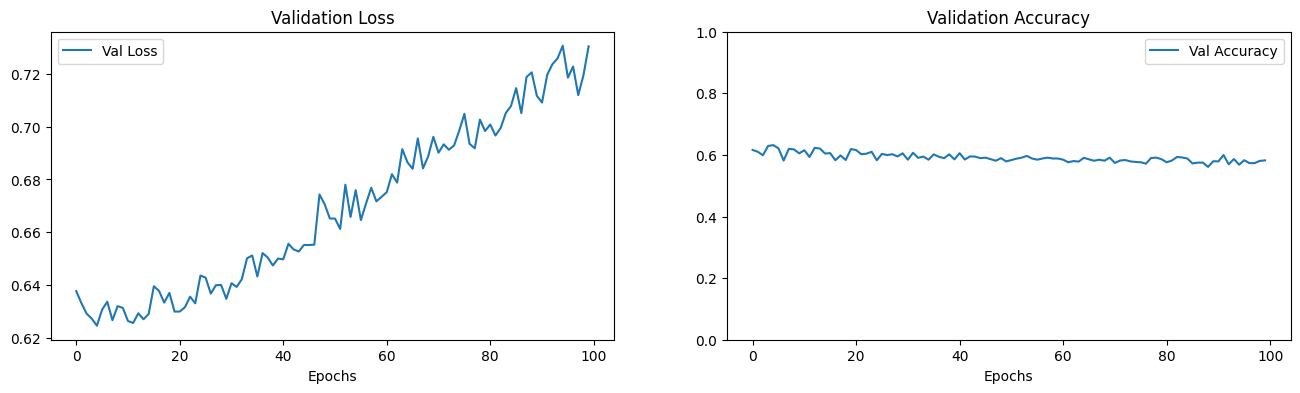

In [20]:
# plot of performance graphs
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121)
ax1.plot(history.history["val_loss"], label='Val Loss')
ax1.set_title("Validation Loss")
ax1.set_xlabel("Epochs")
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"], label='Val Accuracy')
ax2.set_title("Validation Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylim(0, 1)
ax2.legend()

plt.savefig('validation_loss_accuracy.png', bbox_inches='tight', dpi=300)

plt.show()

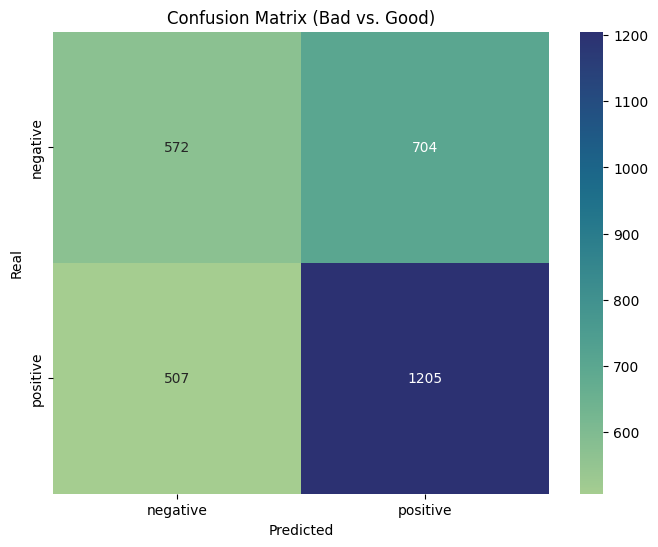

In [21]:
# Gerar matriz de confusão
cm = confusion_matrix(y_test, y_pred_classes)

# Visualizar com rótulos corretos
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='crest', 
    xticklabels=['negative', 'positive'], 
    yticklabels=['negative', 'positive']
)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix (Bad vs. Good)')

plt.savefig('confusion_matrix.png', bbox_inches='tight', dpi=300)

plt.show()

In [22]:
# Análise dos Resultados

TP = 1160
TN = 625
FP = 651
FN = 552

AC = (TP + TN) / (TP + TN + FP + FN)
P = TP / (TP + FP)
S = TP / (TP + FN)
Spe = TN / (FP + TN)
F_score = 2 * (P * S) / (P + S)


metrics = {
    'Métrica': ['Acurácia', 'Precisão', 'Sensibilidade', 'Especificidade', 'F-score'],
    'Valor': [AC, P, S, Spe, F_score],
}

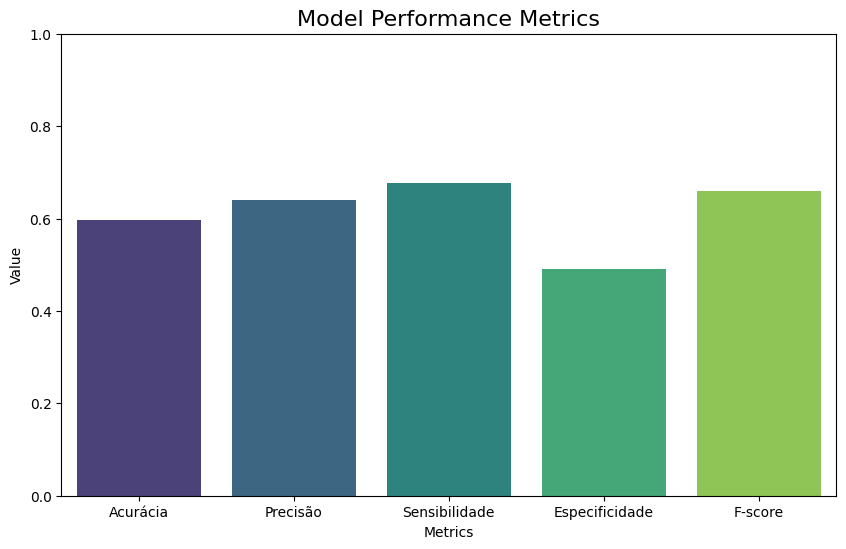

In [23]:
m_plot = pd.DataFrame(metrics)
m_plot.columns = m_plot.columns.str.strip()

plt.figure(figsize=(10, 6))
sns.barplot(x='Métrica', y='Valor', data=m_plot, hue='Métrica', legend=False, palette='viridis')


plt.title('Model Performance Metrics', fontsize=16)
plt.ylim(0, 1)
plt.ylabel('Value')
plt.xlabel('Metrics')

plt.savefig('metrics.png', bbox_inches='tight', dpi=300)

plt.show()